In [1]:
from sklearn.datasets import load_diabetes # para carregar os dados
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # importa o modelo
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt #importa biblioteca de graficos
import statsmodels.api as sm #importa biblioteca de estatística

# carrega os dados
diabetes_data = load_diabetes()
X = diabetes_data['data']
y = diabetes_data['target']
print(diabetes_data.DESCR)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [2]:
print(diabetes_data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

Estatisticas Descritiva de y
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           3.83e-62
Time:                        23:50:08   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335  

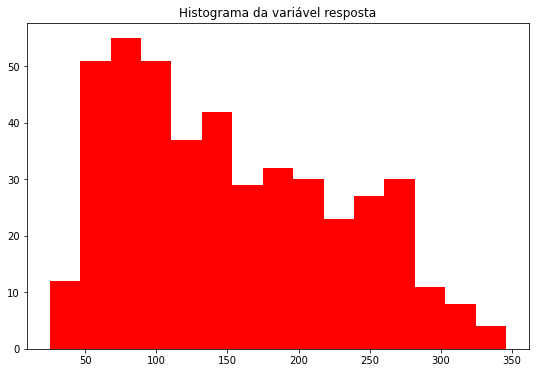

In [3]:
#Estatística Descritiva do Modelo
print("Estatisticas Descritiva de y")
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)
results = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
print(results.summary())
figure=plt.figure(figsize=(9,6))
plt.hist(y,color='red', bins=15)
plt.title('Histograma da variável resposta')
plt.show()

In [4]:
#O passo seguinte é separas os dados em conjunto de teste e de treino (algoritmo supervisionado).
#Esta divisão ocorre de modo aleatório.
#Posteriormente, é criada a variável regr, responsável por criar o modelo de regressão linear.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30) #separa o treino do teste
regr = LinearRegression() # cria o modelo de regressão linear
regr.fit(X_train, y_train) # função de treino do modelo de regressão  linear


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Histograma dos residuos da regressão')

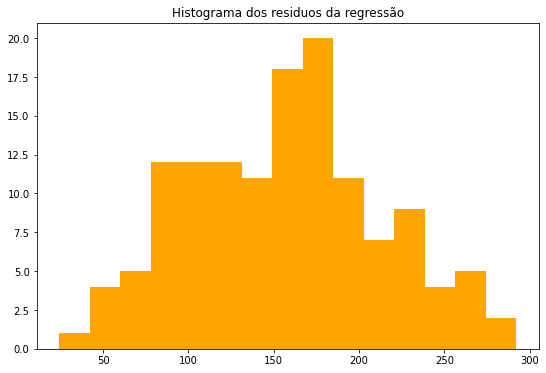

In [5]:
figure=plt.figure(figsize=(9,6))
#histograma dos resíduso do teste
y_hat= regr.predict(X_test)
res= y_test=y_hat
plt.hist(res,color='orange',bins=15)
plt.title('Histograma dos residuos da regressão')


In [11]:
#Após o modelo ser treinado e a visualização dos resíduos, é possível realizar previsões e comparar com os rótulos reais.
#Para isso, será utilizado o Coeficiente de Determinação (R^2), para mostrar o quanto da variação nos preços (variável y) é explicada pelo modelo. 

r2_train = regr.score(X_train, y_train) #calcula o score do treino
r2_test = regr.score(X_test, y_test)#calcula o score do teste

print('R^2 no set de treino: %.4f' % r2_train)
print('R^2 no set de teste: %.4f' % r2_test)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
print('Mean squared error: %.6f' % mean_squared_error(y_test, y_pred))

R^2 no set de treino: 0.5278
R^2 no set de teste: 1.0000
Mean squared error: 0.000000
